# Lab 3: Outlier Detection, Standardization,Normalization and Correlation of Data

In [6]:
### Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a custom dataset for demonstration
data = {
    "Attribute_A": [10, 12, 11, 14, 100, 13, 12, 15, 1, 9, 88],  # Contains an outlier (100)
    "Attribute_B": [200, 210, 215, 220, 230, 240, 250, 100, 216, 225, 56],
    "Attribute_C": [5.1, 5.5, 5.3, 5.8, 5.0, 5.4, 5.6, 5.5, 5.7, 9.0, 5.1],
    "Target": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0]
}
demo_df = pd.DataFrame(data)

# Display the dataset
print("Custom Dataset for Demonstration:")
print(demo_df)

Custom Dataset for Demonstration:
    Attribute_A  Attribute_B  Attribute_C  Target
0            10          200          5.1       1
1            12          210          5.5       0
2            11          215          5.3       1
3            14          220          5.8       0
4           100          230          5.0       1
5            13          240          5.4       0
6            12          250          5.6       1
7            15          100          5.5       0
8             1          216          5.7       1
9             9          225          9.0       0
10           88           56          5.1       0


## 1. Outlier Detection and Handling

### (a) Find and replace the outliers

#### (i) First find the Q1, Q3, IQR, lower bound, upper bound.
#### (ii) Use the outlier conditions on each attribute of the dataframe to indicate which value need to be replaced 
#### (iii) Then replace the outlier values of each attribute with mean, median, etc. (Use np.where to replace the value)

### (c) Finding Outliers in correccted data

# 2. Correlation

### (a) Correlation with target attribute and other attributes

### **Note: check corrwith() function in Pandas**

In [9]:
# Compute Pearson and Spearman Correlation with target attribute
pearson_corr = demo_df.corrwith(demo_df["Target"], method="pearson")
spearman_corr = demo_df.corrwith(demo_df["Target"], method="spearman")

print("Pearson Correlation with Target:")
print(pearson_corr)
print("\nSpearman Correlation with Target:")
print(spearman_corr)


Pearson Correlation with Target:
Attribute_A    0.025108
Attribute_B    0.402658
Attribute_C   -0.332415
Target         1.000000
dtype: float64

Spearman Correlation with Target:
Attribute_A   -0.318267
Attribute_B    0.230940
Attribute_C   -0.318996
Target         1.000000
dtype: float64


### (b) Bar plot of Pearson Correlation with target attribute

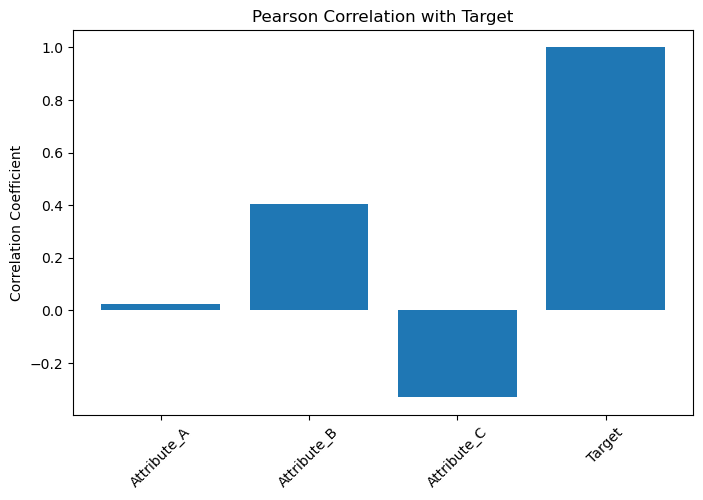

In [10]:
# Plot correlation with Target attribute
plt.figure(figsize=(8, 5))
plt.bar(pearson_corr.index, pearson_corr.values)
plt.title("Pearson Correlation with Target")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.show()


### (c) Scatter plot between each attribute and the target attribute


#Scatter Plot between each attribute and the Target


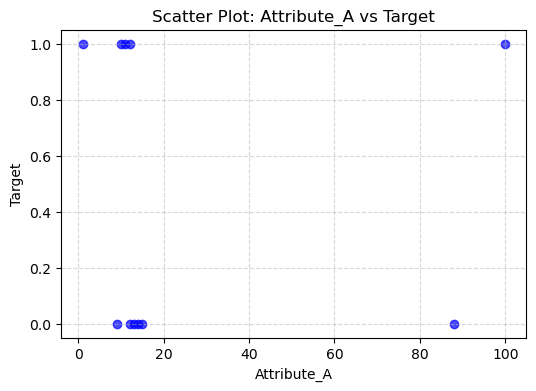

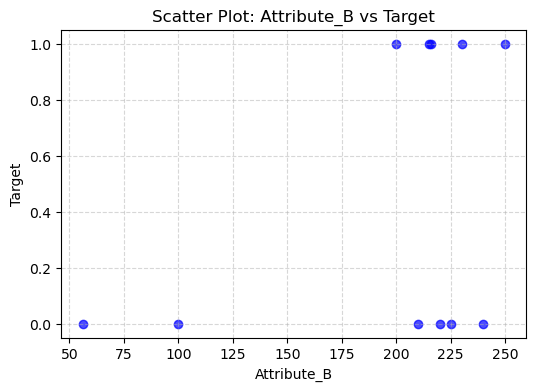

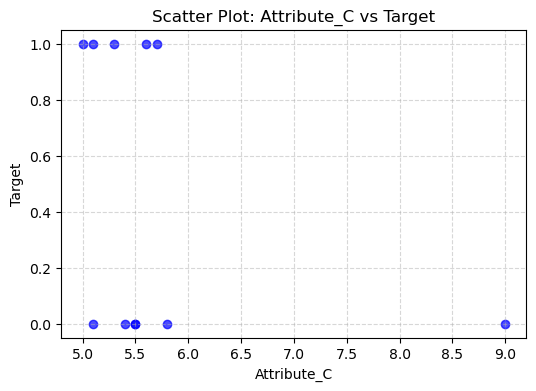

In [11]:
# Scatter Plot between each attribute and the target
print("\n#Scatter Plot between each attribute and the Target")
for col in demo_df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    plt.scatter(demo_df[col], demo_df["Target"], color='blue', alpha=0.7)
    plt.title(f"Scatter Plot: {col} vs Target")
    plt.xlabel(col)
    plt.ylabel("Target")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


### (d) Correlation between all attributes pair

### **Note: check corr() function in Pandas**

In [12]:
# Compute Pearson and Spearman Correlation between all attributes pair
pearson_corr = demo_df.corr(method="pearson")
spearman_corr = demo_df.corr(method="spearman")

print("Pearson Correlation with Target:")
print(pearson_corr)
print("\nSpearman Correlation with Target:")
print(spearman_corr)

Pearson Correlation with Target:
             Attribute_A  Attribute_B  Attribute_C    Target
Attribute_A     1.000000    -0.398660    -0.317663  0.025108
Attribute_B    -0.398660     1.000000     0.214480  0.402658
Attribute_C    -0.317663     0.214480     1.000000 -0.332415
Target          0.025108     0.402658    -0.332415  1.000000

Spearman Correlation with Target:
             Attribute_A  Attribute_B  Attribute_C    Target
Attribute_A     1.000000    -0.086561    -0.478262 -0.318267
Attribute_B    -0.086561     1.000000     0.292240  0.230940
Attribute_C    -0.478262     0.292240     1.000000 -0.318996
Target         -0.318267     0.230940    -0.318996  1.000000


### (e) Heatmap plot of correlation between all attributes pair

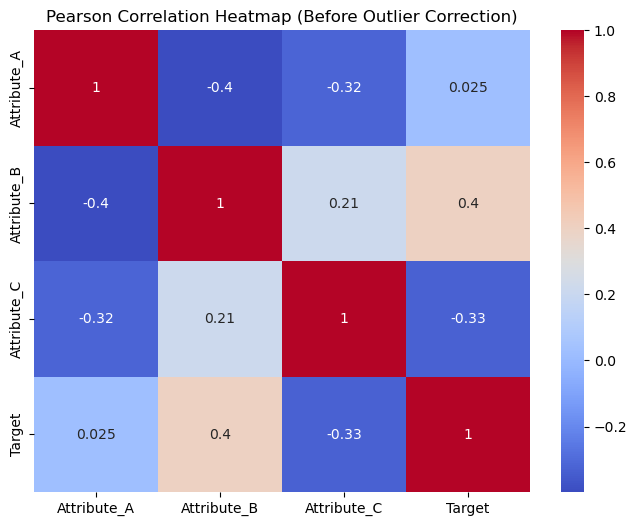

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm")
plt.title("Pearson Correlation Heatmap (Before Outlier Correction)")
plt.show()


# 3. Normalization and Standardization

## (a) Min-Max Normalization for the range (a, b)

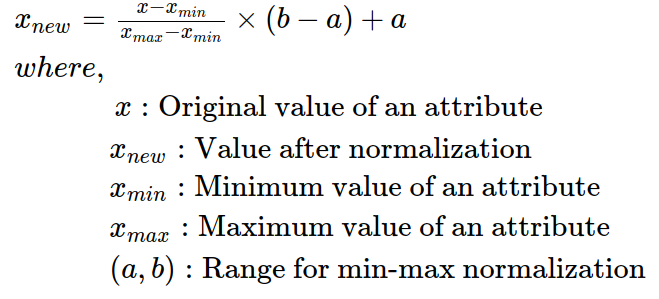
    


## (c) Standardization

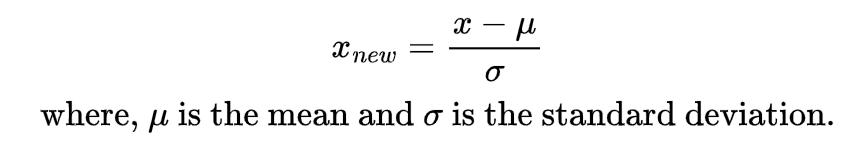

## (d) Min-Max Normalization (Range 0-1) using Scikit-learn

### **Note: check MinMaxScaler() function in Scikit-learn**

In [16]:
### Min-Max Normalization (Range 0-1)
col = corrected_df.columns
data_minmax = corrected_df.copy()
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
data_minmax[col] = scaler_minmax.fit_transform(corrected_df[col])
print("Min-Max Normalized Data (Range 0-1) using Scikit-learn:")
print(data_minmax.head())


Min-Max Normalized Data (Range 0-1) using Scikit-learn:
   Attribute_A  Attribute_B  Attribute_C  Target
0     0.090909     0.742268        0.025     1.0
1     0.111111     0.793814        0.125     0.0
2     0.101010     0.819588        0.075     1.0
3     0.131313     0.845361        0.200     0.0
4     1.000000     0.896907        0.000     1.0


## (e) Standardization using Scikit-learn

### **Note: check StandardScaler() function in Scikit-learn**

In [17]:
### Standardization
col = corrected_df.columns
data_standardized = corrected_df.copy()
scaler_standard = StandardScaler()
data_standardized[col] = scaler_standard.fit_transform(corrected_df[col])
print("Standardized Data using Scikit-learn:")
print(data_standardized.head())

Standardized Data using Scikit-learn:
   Attribute_A  Attribute_B  Attribute_C    Target
0    -0.491159     0.059395    -0.589808  1.095445
1    -0.429413     0.231330    -0.213699 -0.912871
2    -0.460286     0.317297    -0.401753  1.095445
3    -0.367667     0.403264     0.068384 -0.912871
4     2.287395     0.575198    -0.683836  1.095445
